In [8]:
import random
from collections import defaultdict

def run_simulation(N, days, simulations=10):
    results = []
    
    for _ in range(simulations):
        # Track for each employee: number of times they received the virus
        received_count = [0] * N
        
        # Day 0: one random infected employee
        infected = set([random.randint(0, N - 1)])
        
        for day in range(1, days + 1):
            new_infected = defaultdict(int)
            
            for i in range(N):
                # Pick 3 unique recipients
                recipients = random.sample(range(N), 3)
                for recipient in recipients:
                    if i in infected and received_count[i] < 2:
                        # 40% chance to infect
                        if random.random() < 0.4:
                            new_infected[recipient] += 1
            
            for person, times in new_infected.items():
                received_count[person] += times

            # Update infected list (only those who received virus < 2 times and not alert)
            infected = set([i for i, count in enumerate(received_count) if 0 < count < 2])
        
        total_alerted = sum(1 for count in received_count if count > 0)
        results.append(100 * total_alerted / N)
    
    return sum(results) / len(results)

# ---- Simulation Outputs ----
N_values = [100, 1000, 10000]
day_checkpoints = [3, 20, 40]

print("Virus Spread Simulation Averages (% Infected):")
for N in N_values:
    print(f"\nN = {N}")
    for day in day_checkpoints:
        avg_infected = run_simulation(N, day)
        print(f"  Day {day}: {avg_infected:.2f}%")

# ---- Infection Milestones for N = 10000 ----
def milestone_day(N, target_percent, max_days=100):
    for day in range(1, max_days + 1):
        avg_infected = run_simulation(N, day)
        if avg_infected >= target_percent:
            return day
    return -1

print("\nMilestone Days for N = 10,000:")
for milestone in [10, 50]:
    day_reached = milestone_day(10000, milestone)
    print(f"  {milestone}% infected after {day_reached} days")


Virus Spread Simulation Averages (% Infected):

N = 100
  Day 3: 4.30%
  Day 20: 78.40%
  Day 40: 49.80%

N = 1000
  Day 3: 0.57%
  Day 20: 87.42%
  Day 40: 79.42%

N = 10000
  Day 3: 0.08%
  Day 20: 47.86%
  Day 40: 79.35%

Milestone Days for N = 10,000:
  10% infected after 10 days
  50% infected after 15 days


--- Average Infection Percentages After 3, 20, 40 Days ---

N = 100:
 Day 3: 24.10% infected
 Day 20: 98.80% infected
 Day 40: 99.30% infected

N = 1000:
 Day 3: 2.13% infected
 Day 20: 97.72% infected
 Day 40: 99.32% infected

N = 10000:
 Day 3: 0.31% infected
 Day 20: 97.31% infected
 Day 40: 99.32% infected

--- Threshold Days for N = 10,000 ---
 10% infected by day 7
 50% infected by day 9


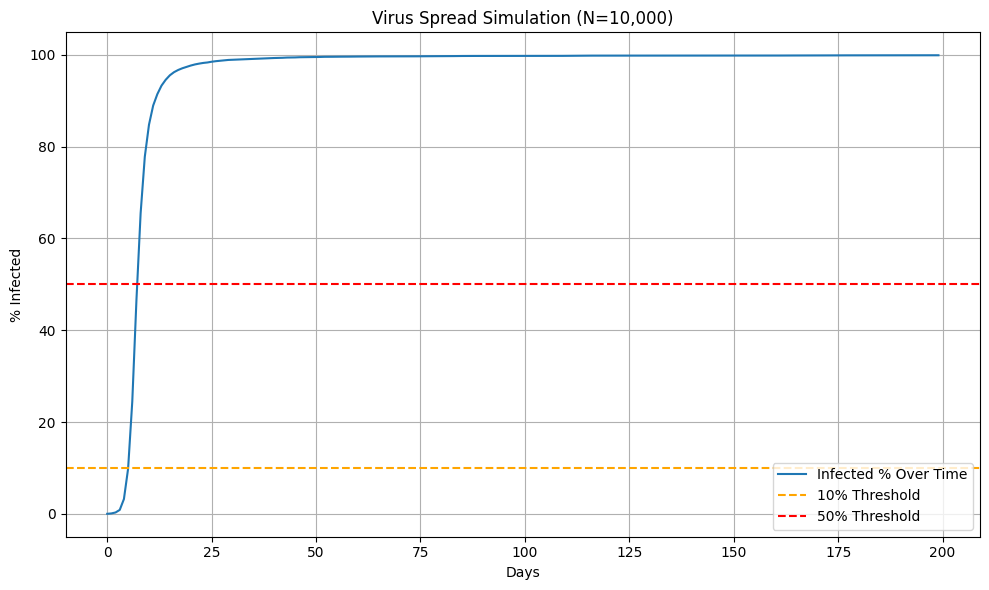

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
INFECTION_CHANCE = 0.4
MESSAGES_PER_DAY = 3
MAX_INFECTIONS_BEFORE_ALERT = 2

# Run the simulation
def run_simulation(N, days):
    population = [{'infections': 0, 'can_spread': True} for _ in range(N)]
    infected = set()

    # Infect one random person at the start
    first_patient = random.randint(0, N - 1)
    population[first_patient]['infections'] = 1
    infected.add(first_patient)

    infected_percentages = []

    for day in range(days):
        for i in range(N):
            if population[i]['infections'] > 0 and population[i]['can_spread']:
                for _ in range(MESSAGES_PER_DAY):
                    recipient = random.randint(0, N - 1)
                    if recipient == i:
                        continue
                    if random.random() < INFECTION_CHANCE:
                        population[recipient]['infections'] += 1
                        infected.add(recipient)
                        if population[recipient]['infections'] >= MAX_INFECTIONS_BEFORE_ALERT:
                            population[recipient]['can_spread'] = False

        infected_percentage = len(infected) / N * 100
        infected_percentages.append(infected_percentage)

    return infected_percentages

# Average results across multiple runs
def average_simulation(N, days, runs=10):
    all_runs = []
    for _ in range(runs):
        result = run_simulation(N, days)
        all_runs.append(result)
    return np.mean(all_runs, axis=0)

# Run simulations for required N values
Ns = [100, 1000, 10000]
days_to_check = [3, 20, 40]

print("--- Average Infection Percentages After 3, 20, 40 Days ---")
for N in Ns:
    avg_result = average_simulation(N, max(days_to_check))
    print(f"\nN = {N}:")
    for day in days_to_check:
        print(f" Day {day}: {avg_result[day-1]:.2f}% infected")

# For N = 10,000, find threshold days for 10% and 50%
def find_threshold_days(N, threshold_percents):
    days = 200  # simulate up to 200 days
    infection_curve = run_simulation(N, days)
    threshold_days = {}
    for day, pct in enumerate(infection_curve):
        for threshold in threshold_percents:
            if threshold not in threshold_days and pct >= threshold:
                threshold_days[threshold] = day + 1
    return threshold_days, infection_curve

thresholds = [10, 50]
threshold_days, curve = find_threshold_days(10000, thresholds)

print("\n--- Threshold Days for N = 10,000 ---")
for threshold, day in threshold_days.items():
    print(f" {threshold}% infected by day {day}")

# Plotting the infection curve for N=10,000
plt.figure(figsize=(10, 6))
plt.plot(curve, label='Infected % Over Time')
plt.axhline(10, color='orange', linestyle='--', label='10% Threshold')
plt.axhline(50, color='red', linestyle='--', label='50% Threshold')
plt.title("Virus Spread Simulation (N=10,000)")
plt.xlabel("Days")
plt.ylabel("% Infected")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Running simulation for N = 100
Running simulation for N = 1000
Running simulation for N = 10000

Results for N = 100:
After 3 days: 27.40% infected
After 20 days: 98.07% infected
After 40 days: 99.40% infected

Results for N = 1000:
After 3 days: 5.77% infected
After 20 days: 98.05% infected
After 40 days: 99.44% infected

Results for N = 10000:
After 3 days: 0.64% infected
After 20 days: 97.34% infected
After 40 days: 99.30% infected

For N = 10,000:
10% threshold reached after 6 days
50% threshold reached after 9 days


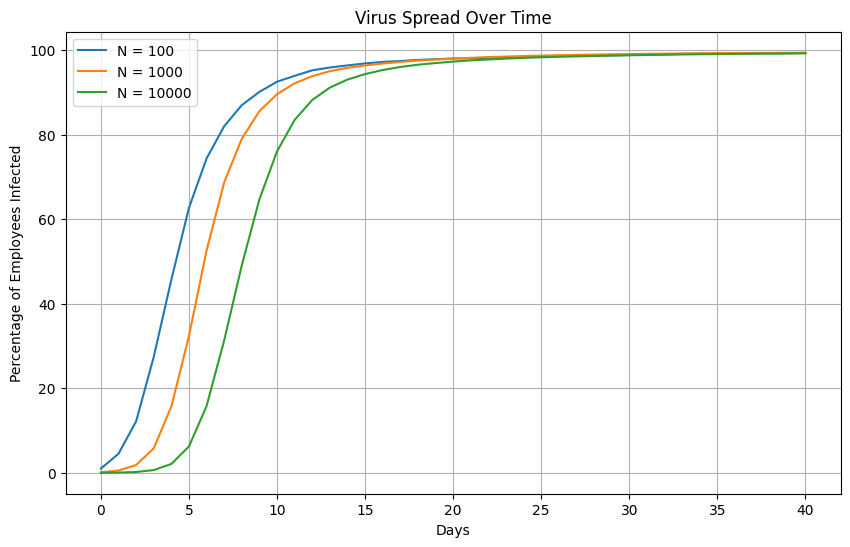

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def simulate_virus_spread(N, days, num_simulations=30):
    """
    Simulate virus spread through a network where:
    - Each employee sends 3 messages daily to random employees
    - Infected employees spread the virus with 40% probability
    - Employees stop spreading after receiving the virus twice
    
    Parameters:
    - N: Number of employees
    - days: Number of days to simulate
    - num_simulations: Number of simulations to run
    
    Returns:
    - avg_infected_percentages: Average percentage of infected employees per day
    """
    all_results = np.zeros((num_simulations, days+1))
    
    for sim in range(num_simulations):
        # Track infection status (0=clean, 1=infected but spreading, 2=infected not spreading)
        infection_status = np.zeros(N, dtype=int)
        
        # Track how many times each employee has received the virus
        virus_exposure_count = np.zeros(N, dtype=int)
        
        # Patient zero - start with one infected employee
        infection_status[0] = 1
        virus_exposure_count[0] = 1
        
        # Record initial state
        all_results[sim, 0] = 1  # Only one employee infected initially
        
        # Simulate each day
        for day in range(1, days+1):
            # Each employee sends 3 messages
            for employee in range(N):
                # Skip if employee is not infected or not spreading
                if infection_status[employee] != 1:
                    continue
                    
                # Send 3 messages
                for _ in range(3):
                    # Select random recipient (not self)
                    recipients = np.random.choice(np.delete(np.arange(N), employee), 1)
                    recipient = recipients[0]
                    
                    # 40% chance of spreading the virus
                    if np.random.random() < 0.4:
                        # Increase recipient's exposure count
                        virus_exposure_count[recipient] += 1
                        
                        # Mark as infected if not already
                        if infection_status[recipient] == 0:
                            infection_status[recipient] = 1
                        
                        # If received twice, stop spreading
                        if virus_exposure_count[recipient] >= 2:
                            infection_status[recipient] = 2
            
            # Record number of infected employees (status 1 or 2)
            infected_count = np.sum(infection_status > 0)
            all_results[sim, day] = infected_count
    
    # Convert to percentages
    all_results = (all_results / N) * 100
    
    # Calculate average across all simulations
    avg_infected_percentages = np.mean(all_results, axis=0)
    
    return avg_infected_percentages

def find_threshold_days(data, threshold_percentage):
    """Find the first day when infection reaches or exceeds the threshold percentage"""
    for day, percentage in enumerate(data):
        if percentage >= threshold_percentage:
            return day
    return "Not reached"

# Run simulations for different values of N
N_values = [100, 1000, 10000]
days_to_simulate = 40
results = {}

for N in N_values:
    print(f"Running simulation for N = {N}")
    results[N] = simulate_virus_spread(N, days_to_simulate)

# Display results for specific days
for N in N_values:
    print(f"\nResults for N = {N}:")
    print(f"After 3 days: {results[N][3]:.2f}% infected")
    print(f"After 20 days: {results[N][20]:.2f}% infected")
    print(f"After 40 days: {results[N][40]:.2f}% infected")

# For N = 10,000, find when 10% and 50% thresholds are reached
N_10k = 10000
day_10_percent = find_threshold_days(results[N_10k], 10)
day_50_percent = find_threshold_days(results[N_10k], 50)

print(f"\nFor N = 10,000:")
print(f"10% threshold reached after {day_10_percent} days")
print(f"50% threshold reached after {day_50_percent} days")

# Plot the results
plt.figure(figsize=(10, 6))
for N in N_values:
    plt.plot(range(days_to_simulate+1), results[N], label=f"N = {N}")

plt.xlabel("Days")
plt.ylabel("Percentage of Employees Infected")
plt.title("Virus Spread Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def simulate_virus_spread(N, days, num_simulations=30):
    """
    Simulate virus spread through a network where:
    - Each employee sends 3 messages daily to random other employees
    - Infected employees spread the virus with 40% probability
    - Employees stop spreading after receiving the virus twice
    
    Parameters:
    - N: Number of employees (must be even)
    - days: Number of days to simulate
    - num_simulations: Number of simulations to run
    
    Returns:
    - avg_infected_percentages: Average percentage of infected employees per day
    """
    all_results = np.zeros((num_simulations, days+1))
    
    for sim in range(num_simulations):
        # Track infection status (0=clean, 1=infected once, 2=infected twice or more)
        infection_status = np.zeros(N, dtype=int)
        
        # Track if employee is actively spreading the virus
        is_spreading = np.zeros(N, dtype=bool)
        
        # Patient zero - start with one infected employee
        infection_status[0] = 1
        is_spreading[0] = True
        
        # Record initial state (% infected)
        all_results[sim, 0] = 100 * np.sum(infection_status > 0) / N
        
        # Simulate each day
        for day in range(1, days+1):
            # Each employee sends 3 messages to 3 different employees
            for sender in range(N):
                # Select 3 unique recipients (excluding self)
                valid_recipients = list(range(N))
                valid_recipients.remove(sender)
                recipients = np.random.choice(valid_recipients, 3, replace=False)
                
                # If sender is infected and spreading, might transmit the virus
                if is_spreading[sender]:
                    for recipient in recipients:
                        # 40% chance of spreading the virus
                        if np.random.random() < 0.4:
                            # Increase recipient's infection status if not already at max
                            if infection_status[recipient] < 2:
                                infection_status[recipient] += 1
                            
                            # Mark as spreading if not already infected twice
                            if infection_status[recipient] < 2:
                                is_spreading[recipient] = True
                            else:
                                # Stop spreading after being infected twice
                                is_spreading[recipient] = False
            
            # Record percentage of infected employees (status >= 1)
            infected_percent = 100 * np.sum(infection_status > 0) / N
            all_results[sim, day] = infected_percent
    
    # Calculate average across all simulations
    avg_infected_percentages = np.mean(all_results, axis=0)
    std_infected_percentages = np.std(all_results, axis=0)
    
    return avg_infected_percentages, std_infected_percentages

def find_threshold_days(data, threshold_percentage):
    """Find the first day when infection reaches or exceeds the threshold percentage"""
    for day, percentage in enumerate(data):
        if percentage >= threshold_percentage:
            return day
    return "Not reached"

# Run simulations for different values of N
N_values = [100, 1000, 10000]
days_to_simulate = 40
results = {}
std_devs = {}

for N in N_values:
    print(f"Running simulation for N = {N}")
    results[N], std_devs[N] = simulate_virus_spread(N, days_to_simulate)

# Display results for specific days
for N in N_values:
    print(f"\nResults for N = {N}:")
    print(f"After 3 days: {results[N][3]:.2f}% ± {std_devs[N][3]:.2f}% infected")
    print(f"After 20 days: {results[N][20]:.2f}% ± {std_devs[N][20]:.2f}% infected")
    print(f"After 40 days: {results[N][40]:.2f}% ± {std_devs[N][40]:.2f}% infected")

# For N = 10,000, find when 10% and 50% thresholds are reached
N_10k = 10000
day_10_percent = find_threshold_days(results[N_10k], 10)
day_50_percent = find_threshold_days(results[N_10k], 50)

print(f"\nFor N = 10,000:")
print(f"10% threshold reached after {day_10_percent} days")
print(f"50% threshold reached after {day_50_percent} days")

# Plot the results
plt.figure(figsize=(12, 7))
for N in N_values:
    plt.plot(range(days_to_simulate+1), results[N], label=f"N = {N}", linewidth=2)

plt.xlabel("Days", fontsize=12)
plt.ylabel("Percentage of Employees Infected (%)", fontsize=12)
plt.title("Virus Spread Over Time", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("virus_spread.png")
plt.show()

# Focus on early days
plt.figure(figsize=(12, 7))
for N in N_values:
    plt.plot(range(10+1), results[N][:11], label=f"N = {N}", linewidth=2, marker='o')

plt.xlabel("Days", fontsize=12)
plt.ylabel("Percentage of Employees Infected (%)", fontsize=12)
plt.title("Virus Spread - First 10 Days", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("virus_spread_early.png")
plt.show()

Running simulation for N = 100
Running simulation for N = 1000
Running simulation for N = 10000


KeyboardInterrupt: 